#**Cleaning the data**

##Loading data

In [ ]:
import pandas as pd


In [ ]:
 #Loading data
file_path = "/content/4A.xlsx"
data = pd.read_excel(file_path)
data.head()

,INITIALS,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,DATE OF ADMISSION,DATE OF DISCHARGE,WORKING DIAGNOSIS,ICD10 CODE,FINAL DIAGNOSIS,ICD10CODE,OUT COME,DAYS OF STAY,NUMBER OF PREVIOUS ADMISSIONS,DATE OF ENTRY,MARITAL STATUS
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,AV,GI,1861499,M,28,Pentacostal,kampala,2010-12-01 00:00:00,2010-01-01 00:00:00,"ISS,B/pneumonia,,","Z21,J18,,","B/pneumonia,,","J18,,",IMPROVED,1.0,1.0,2010-12-03,9
2,AV,GI,1861453,M,80,moslem,kampala,2010-11-30 00:00:00,2010-12-03 00:00:00,"oesophagitis,B/pneumonia,,","K20,J18,,","Oesophagitis,B/pneumonia,","K20,J18,",IMPROVED,3.0,3.0,2010-12-06,2
3,AV,GI,1861416,M,30,Protestant,Nakasongola,2010-11-30 00:00:00,2010-12-05 00:00:00,"ISS,Abdominal TB,,","Z21,A18.3,,","ISS,Abdominal TB,","Z21,A18.3,",IMPROVED,5.0,5.0,2010-12-06,2
4,AV,GI,1861726,F,40,catholic,Busia,2010-12-03 00:00:00,2010-12-04 00:00:00,"HIV +ve,PID,,","Z21,N73.9,,","HIV +ve,PID,","Z21,N73.9,",IMPROVED,1.0,1.0,2010-12-06,9


##Initial

In [ ]:
#Removing features which are not going to be used for prediction
col_to_delete = ['INITIALS', 'ICD10 CODE', 'ICD10CODE', 'FINAL DIAGNOSIS', 'DATE OF ENTRY']

data = data.drop(columns=col_to_delete)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35953 entries, 0 to 35952
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UNIT                           35952 non-null  object 
 1   IP NUMBER                      35927 non-null  object 
 2   SEX                            35948 non-null  object 
 3   AGE                            35948 non-null  object 
 4   RELIGION                       35884 non-null  object 
 5   DISTRICT OF RESIDENCE          35949 non-null  object 
 6   DATE OF ADMISSION              35950 non-null  object 
 7   DATE OF DISCHARGE              35951 non-null  object 
 8   WORKING DIAGNOSIS              35952 non-null  object 
 9   OUT COME                       35951 non-null  object 
 10  DAYS OF STAY                   35950 non-null  float64
 11  NUMBER OF PREVIOUS ADMISSIONS  35942 non-null  float64
 12  MARITAL STATUS                 35941 non-null 

In [ ]:

data.shape

(35953, 13)

In [ ]:
#data.dropna(subset='NUMBER OF PREVIOUS ADMISSIONS', inplace=True)

In [ ]:
#converting the Date of admission column to DateTime format
data['DATE OF ADMISSION'] = pd.to_datetime(data['DATE OF ADMISSION'], errors='coerce')
#creating the columns
data['MONTH OF ADMISSION'] = data['DATE OF ADMISSION'].dt.strftime('%B')
data['DAY OF ADMISSION'] = data['DATE OF ADMISSION'].dt.strftime('%A')
data['YEAR OF ADMISSION'] = data['DATE OF ADMISSION'].dt.year

#converting the date of discaharge column to DateTime format
data['DATE OF DISCHARGE'] = pd.to_datetime(data['DATE OF DISCHARGE'], errors='coerce')
data['YEAR OF DISCHARGE'] = data['DATE OF DISCHARGE'].dt.year
data['DURATION'] = (data['DATE OF DISCHARGE'] - data['DATE OF ADMISSION']).dt.days + 1


##**Cleanig RELIGIONS**

In [ ]:
data['RELIGION'].unique()

array([nan, 'Pentacostal', 'moslem', 'Protestant', 'catholic', 'Catholic',
       'SDA', 'C O U', 'Moslem', 'R/C', 'B/A', 'Islam', 'COU', '?',
       'S D A', 'R /C', 'P.A.G', 'PROTESTANT', 'cou', 'C/U', 'ISLAM',
       'c o u', 'islam', 'ISALM', 'PAG', 'P A G', 'IsLAM', 'r/c', 'R/A',
       'CO U', 'SAVED', 'CUO', 'JEHOVA', 'ORTHODOX', 'ILSAM', 'JAHOVAH',
       'MOSLEM', 'PRO', 'OTHERS', 'OTHER', 'F', 'CATHOLIC', 'ISLMA',
       'MESSEIANIC', 'IISLAM', 'ISAM', 'JOHOVAH', 'ISLLAM', 'SLAM',
       'JEHOVAH', 'PROT', 'B,A', 'R,C', 'ANGELLA', 'PROST', 'C.O.U',
       'WAKISO', 'ANGLICAN', 'PGA', 'R/C.', 'ISLAM.', 'GOU', 'LSLAM',
       'ANGLIAN'], dtype=object)

In [ ]:
#Grouping religions into Anglican, Moslem, Pentecoatal, Catholic, Others and unknown
religions = {'Protestant':'COU', 'C O U':'COU','c o u': 'COU', 'C/U': 'COU', 'Islam':'ISLAM', 'CUO':'COU',
             'B/A':'PENTECOSTAL', 'SDA':'OTHERS','PRO':'OTHERS','PAG':'OTHERS', 'MOSLEM':'ISLAM',
             '?':'OTHERS', 'R/C':'CATHOLIC', 'islam':'ISLAM', 'PAG':'PENTECOSTAL', 'P A G':'PENTECOSTAL',
             'IsLAM':'ISLAM', 'r/c':'CATHOLIC', 'R/A':'CATHOLIC', 'CO U':'COU', 'SAVED':'PENTECOSTAL',
             'JEHOVA':'OTHERS', 'ORTHODOX':'OTHERS', 'ILSAM':'ISLAM', 'JAHOVAH':'OTHERS', 'PRO':'COU',
             'F':'OTHERS', 'ISLMA':'ISLAM', 'MESSEIANIC':'OTHERS', 'IISLAM':'ISLAM', 'ISAM':'ISLAM',
             'JOHOVAH':'OTHERS', 'ISLLAM':'ISLAM', 'SLAM':'ISLAM', 'JEHOVAH':'OTHERS', 'PROT':'COU',
             'B,A':'PENTECOSTAL', 'R,C':'CATHOLIC', 'ANGELLA':'COU', 'PROST':'COU', 'C.O.U':'COU',
             'ANGLICAN':'COU', 'PGA':'PENTECOSTAL', 'R/C.':'CATHOLIC', 'GOU':'COU', 'LSLAM':'ISLAM',
             'ANGLIAN':'COU', 'OTHER':'OTHERS',  'WAKISO':'OTHERS', 'ISALM':'ISLAM', 'P.A.G':'PENTECOSTAL',
             'cou':'COU','Pentacostal':'PENTECOSTAL', 'moslem':'ISLAM', 'catholic':'CATHOLIC',
             'Catholic':'CATHOLIC', 'Moslem':'ISLAM', 'S D A':'OTHERS', 'R /C':'CATHOLIC',
             'PROTESTANT':'COU','ISLAM.':'ISLAM'
             }
data['RELIGION'] = data['RELIGION'].replace(religions)

#Filling the empty ones with OTHERS
data = data.dropna(subset=['RELIGION'])

data['RELIGION'].unique()

array(['PENTECOSTAL', 'ISLAM', 'COU', 'CATHOLIC', 'OTHERS'], dtype=object)

##**Cleaning AGE**

In [ ]:
data['AGE'].unique()

array(['28', '80', '30', '40', '45', '53', '20', '50', '39', '21', '24',
       '32', '35', '38', '22', '70', '16', '49', '13', '46', '36', '44',
       '47', '55', '25', '51', '23', '54', '59', '60', '17', '26', '43',
       '52', '33', '57', '58', '37', '87', '14', '41', '27', '48', '83',
       '68', '18', '34', '76', '74', '42', '75', '65', '19', '82', '62',
       '66', '63', '61', '86', '29', '69', '73', '85', '31', '89', '67',
       '56', nan, '64', '15', '72', '90', '78', '84', '12', '11', '100',
       '71', 'AD', '81', '79', '77', '91', '?', '93', '98', '25+', '40+',
       '88', '95', '94', '96', '92', '60+', '70+', '30+', '97', '102',
       '64+', '100+', '31.', '5', '10'], dtype=object)

In [ ]:
#Removing all samples with empty age
#data = data.dropna(subset=['AGE'])

#removing all samples with non-numeric and unclear age value
data = data[~data['AGE'].isin(['?', 'AD'])]
data['AGE'] = data['AGE'].replace({'31.':31, '25+':25,'40+':40,'60+':60,'70+':70,
                                 '30+':34,'64+':64,'100+':100})
#Converting age datatype to integer
#data['AGE'] = data['AGE'].astype(int)

data['AGE'].unique()

array(['28', '80', '30', '40', '45', '53', '20', '50', '39', '21', '24',
       '32', '35', '38', '22', '70', '16', '49', '13', '46', '36', '44',
       '47', '55', '25', '51', '23', '54', '59', '60', '17', '26', '43',
       '52', '33', '57', '58', '37', '87', '14', '41', '27', '48', '83',
       '68', '18', '34', '76', '74', '42', '75', '65', '19', '82', '62',
       '66', '63', '61', '86', '29', '69', '73', '85', '31', '89', '67',
       '56', nan, '64', '15', '72', '90', '78', '84', '12', '11', '100',
       '71', '81', '79', '77', '91', '93', '98', 25, 40, '88', '95', '94',
       '96', '92', 60, 70, 34, '97', '102', 64, 100, 31, '5', '10'],
      dtype=object)

In [ ]:
print(data['AGE'].isna().sum())

2


##**Cleaning DISTRICT OF RESIDENCE**

In [ ]:
data['DISTRICT OF RESIDENCE'].unique()

array(['kampala', 'Nakasongola', 'Busia', 'Kiruhura', 'Kampala', 'Rakai',
       'Luwero', 'Mukono', 'MITYANA', 'KAMPALA', 'Wakiso', 'Kibale',
       'Soroti', 'Mityana', 'Kabong', 'Gomba', 'Bukwo', 'Kayunga',
       'Mpigi', 'Kabarole', nan, 'Kasese', 'Kamugi', 'Bokomasimbi',
       'TORORO', 'WAKISO', 'LUWERO', 'MPIGI', 'KASESE', 'KAMULI',
       'MUBENDE', 'RAKAI', 'BUIKWE', 'KABALE', 'KAMPALA.', 'MUKONO',
       'MASAKA', 'JINJA', 'GOMBA', 'mpigi', 'KAMWENGE', 'BUVUMA',
       'KIBOGA', 'BUNOMANSIBI', 'NTUNGAMO', 'BWIIKE', 'SEMBABULE',
       'luwero', 'IGANGA', 'KAPALA', 'BUSIA', 'NAMATAMBA', 'NAMUTUMBA',
       'MASINDI', 'RWENGO', 'MANAFA', 'RWEMIYAGA', 'KAGOMA', 'KYANKWANZI',
       'KAYUNGA', 'KYAKWANZE', 'KISORO', 'KANUGU', 'NAKASEKE', 'BUYUKWE',
       'RUKUNGIRI', 'KIRYANDONGO', 'PALLISA', 'ARUA', 'LYANTONDE',
       'KALANGALA', 'KABAROLE', 'LUWUKA', 'KYENJOJO', 'MBALA-MANAFA',
       'KMPALA', 'BUKASA', 'KALIRO', 'MOYI', 'PALISA', 'APAC', 'BUSHENYI',
       'NTENJERU', 'K

In [ ]:
missing = data['DISTRICT OF RESIDENCE'].isna().sum()
print(missing)

1


In [ ]:
#Deleting samples with no district of residence
data = data.dropna(subset=['DISTRICT OF RESIDENCE'])

data['REGION'] = data['DISTRICT OF RESIDENCE']

#Renaming Wrongly spelt districts
rename = {'RUGUNGIRI':'RUKUNGIRI', 'NSINGIRO':'ISINGIRO', 'MITOMA':'MITOOMA', 'KIRIHURA':'KIRUHURA',
          'KIRUHUWA':'KIRUHURA', 'KYANKWANSI':'KYANKWANZI', 'KYAKWANZI':'KYANKWANZI',
          'KAYUNYI':'KAYUNGA', 'LUWERO':'LUWEERO', 'MITYANA,':'MITYANA', 'KYENGERA':'WAKISO',
          'KAKUMIRU':'KAKUMIRO','BATAMBALA':'BUTAMBALA', 'BUKOMASIMBI':'BUKOMANSIMBI',
          'IGAANGA':'IGANGA', 'BUYUNKWE':'BUIKWE', 'KIBALE':'KIBAALE', 'KABAALE':'KABALE',
          'BUYAGABO':'BUNYANGABO', 'BULISA':'BULIISA', 'KIRYANDOGO':'KIRYANDONGO',
          'MUTONO':'MUKONO', 'MUBEMDE':'MUBENDE', 'NAMAGOMBA':'BUSIRO', 'TB ADHEKAMPALA':'KAMPALA',
          'MASINDE':'MASINDI','BUYUKWE':'BUIKWE','WAKISI':'WAKISO', 'WAKISO/MASINDI':'WAKISO',
          'BUSHALI':'BUSHENYI'
          }
data['REGION'] = data['REGION'].replace(rename)




<ipython-input-16-b21aae1cda0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['REGION'] = data['DISTRICT OF RESIDENCE']
<ipython-input-16-b21aae1cda0d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['REGION'] = data['REGION'].replace(rename)


In [ ]:
data['REGION'].unique()

array(['kampala', 'Nakasongola', 'Busia', 'Kiruhura', 'Kampala', 'Rakai',
       'Luwero', 'Mukono', 'MITYANA', 'KAMPALA', 'Wakiso', 'Kibale',
       'Soroti', 'Mityana', 'Kabong', 'Gomba', 'Bukwo', 'Kayunga',
       'Mpigi', 'Kabarole', 'Kasese', 'Kamugi', 'Bokomasimbi', 'TORORO',
       'WAKISO', 'LUWEERO', 'MPIGI', 'KASESE', 'KAMULI', 'MUBENDE',
       'RAKAI', 'BUIKWE', 'KABALE', 'KAMPALA.', 'MUKONO', 'MASAKA',
       'JINJA', 'GOMBA', 'mpigi', 'KAMWENGE', 'BUVUMA', 'KIBOGA',
       'BUNOMANSIBI', 'NTUNGAMO', 'BWIIKE', 'SEMBABULE', 'luwero',
       'IGANGA', 'KAPALA', 'BUSIA', 'NAMATAMBA', 'NAMUTUMBA', 'MASINDI',
       'RWENGO', 'MANAFA', 'RWEMIYAGA', 'KAGOMA', 'KYANKWANZI', 'KAYUNGA',
       'KYAKWANZE', 'KISORO', 'KANUGU', 'NAKASEKE', 'RUKUNGIRI',
       'KIRYANDONGO', 'PALLISA', 'ARUA', 'LYANTONDE', 'KALANGALA',
       'KABAROLE', 'LUWUKA', 'KYENJOJO', 'MBALA-MANAFA', 'KMPALA',
       'BUKASA', 'KALIRO', 'MOYI', 'PALISA', 'APAC', 'BUSHENYI',
       'NTENJERU', 'KATAKWI', 'KIBAA

In [ ]:
#Grouping the districts int regions ie northen, eastern, central, western and unknown

northern = {'ADJUMANI': 'NORTHERN', 'ARUA': 'NORTHERN', 'AMURU': 'NORTHERN',
            'APAC': 'NORTHERN', 'GULU': 'NORTHERN', 'KOBOKO':'NORTHERN', 'KOTIDO': 'NORTHERN',
            'LIRA': 'NORTHERN',  'NAPARK':'NORTHERN', 'NEBBI':'NORTHERN', 'MOROTO': 'NORTHERN'}
data['REGION'] = data['REGION'].replace(northern)

eastern = {'AMURIA':'EASTERN', 'BUDAKA':'EASTERN', 'BUGIRI':'EASTERN', 'TORORO':'EASTERN',
           'BUSIA':'EASTERN', 'BUYENDE':'EASTERN', 'BUYUKWE':'EASTERN', 'IGAANGA':'EASTERN',
           'IGANGA':'EASTERN', 'JINJA':'EASTERN', 'KABERAMAIDO':'EASTERN', 'KAMULI':'EASTERN',
           'KUMI':'EASTERN','MAYUGE':'EASTERN', 'MBALE':'EASTERN', 'MBIKO':'EASTERN',
           'NAMAYINGO':'EASTERN', 'NAMUTUMBA':'EASTERN', 'SOROTI':'EASTERN',
           }
data['REGION'] = data['REGION'].replace(eastern)

central = {'Kampala':'CENTRAL', 'Wakiso':'CENTRAL', 'BUSIRO':'CENTRAL', 'BUTAMBALA':'CENTRAL',
           'ENTEBBE':'CENTRAL', 'GOMBA':'CENTRAL', 'GOMBE':'CENTRAL', 'KAKUMIRO':'CENTRAL',
           'KALANGALA':'CENTRAL', 'KALUNGU':'CENTRAL', 'KALWANA':'CENTRAL', 'KAMPALA':'CENTRAL',
           'KASANDA':'CENTRAL', 'KAWEMPE':'CENTRAL', 'KAYUNGA':'CENTRAL',  'KYANKWANZI':'CENTRAL',
           'KYOTERA':'CENTRAL', 'LUWEERO':'CENTRAL', 'LWENGO':'CENTRAL', 'LYANTONDE':'CENTRAL',
           'MASAKA':'CENTRAL', 'MITYANA':'CENTRAL', 'MPIGI':'CENTRAL', 'MUBENDE':'CENTRAL',
           'MUKONO':'CENTRAL', 'NAKASEKE':'CENTRAL', 'Nakasongola':'CENTRAL', 'SEMBABULE':'CENTRAL',
           'SESE':'CENTRAL', 'WAKISO':'CENTRAL','BUKUMASIMBI':'CENTRAL',
           'KIBOGA':'CENTRAL', 'NAKASONGOLA':'CENTRAL', 'BUKOMANSIMBI':'CENTRAL', 'BUIKWE':'EASTERN'
           }
data['REGION'] = data['REGION'].replace(central)

western ={ 'BULIISA':'WESTERN', 'BUSHENYI':'WESTERN', 'BUNYANGABO':'WESTERN',
           'FORTPORTAL':'WESTERN', 'HOIMA':'WESTERN', 'KAGADI':'WESTERN', 'KIRYANDOGO':'WESTERN',
           'KIRYANDONGO':'WESTERN', 'KYEGEGWA':'WESTERN', 'KYENJOJO':'WESTERN', 'MASINDE':'WESTERN',
           'MASINDI':'WESTERN', 'BUHWEJU':'WESTERN', 'ISINGIRO':'WESTERN', 'KABALE':'WESTERN',
           'MBARARA':'WESTERN', 'KIBAALE':'WESTERN', 'KANUNGU':'WESTERN', 'MITOOMA':'WESTERN',
           'RUKUNGIRI':'WESTERN', 'KAMWENGE':'WESTERN', 'KABAALE':'WESTERN',
           'NTOROKO':'WESTERN', 'NTUNGAMO':'WESTERN', 'RAKAI':'WESTERN', 'KABAROLE':'WESTERN',
           'KIRUHURA':'WESTERN', 'SHEMA':'WESTERN', 'KASESE':'WESTERN'
          }
data['REGION'] = data['REGION'].replace(western)

unknown ={'?':'UNKNOWN', 'SULAGABA':'UNKNOWN', 'BWENKE':'UNKNOWN','SUDAN':'UNKNOWN',
          'GOLANAKASON':'UNKNOWN'}
data['REGION'] = data['REGION'].replace(unknown)


data['REGION'].unique()

array(['kampala', 'CENTRAL', 'Busia', 'Kiruhura', 'Rakai', 'Luwero',
       'Mukono', 'Kibale', 'Soroti', 'Mityana', 'Kabong', 'Gomba',
       'Bukwo', 'Kayunga', 'Mpigi', 'Kabarole', 'Kasese', 'Kamugi',
       'Bokomasimbi', 'EASTERN', 'WESTERN', 'KAMPALA.', 'mpigi', 'BUVUMA',
       'BUNOMANSIBI', 'BWIIKE', 'luwero', 'KAPALA', 'NAMATAMBA', 'RWENGO',
       'MANAFA', 'RWEMIYAGA', 'KAGOMA', 'KYAKWANZE', 'KISORO', 'KANUGU',
       'PALLISA', 'NORTHERN', 'LUWUKA', 'MBALA-MANAFA', 'KMPALA',
       'BUKASA', 'KALIRO', 'MOYI', 'PALISA', 'NTENJERU', 'KATAKWI',
       'KISOROR', 'FORTPOTAL', 'RUBIRIZI', 'KISOLO', 'NAKASEKA',
       'BUKOMANSIBI', 'PALIISA', 'BUNDIBUJJO', 'BUGEMBE', 'MPUNGA',
       'KIBINGE', 'KISUBI', 'KASUBI', 'LUUKA', 'MUSANSI', 'KIBUKU',
       'BULEMEZI', 'KABULLA', 'UNKNOWN', 'MAYUGWA', 'MUTYANA', 'BUTAMBA',
       'IBANDA', 'MASAkA', 'RWANGO', 'AGAGO', 'BAVUMA', 'KYEGYERWA',
       'PAIDA', 'NAKIFUMA', 'KOLE', 'BUTAREJA', 'BUTELEJA', 'KYENJONJO',
       'KIBOGO', 'KYAN

In [ ]:
data.sample(3)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,DATE OF ADMISSION,DATE OF DISCHARGE,WORKING DIAGNOSIS,OUT COME,DAYS OF STAY,NUMBER OF PREVIOUS ADMISSIONS,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,YEAR OF DISCHARGE,DURATION,REGION
8585,GI,2100494,M,54,ISLAM,WAKISO,2012-11-28,2012-12-06,"DM,DYSPESIA,PANCREATITIS",IMPROVED,8.0,8.0,2,November,Wednesday,2012.0,2012.0,8.0,CENTRAL
32610,IDF,417966,F,64,ISLAM,WAKISO,2018-09-04,2018-09-07,MALARIA,IMPROVED,3.0,0.0,9,September,Tuesday,2018.0,2018.0,3.0,CENTRAL
34915,IDF,458962,F,74,COU,WAKISO,2019-05-15,2019-05-18,"PHTN,DM,HIV",IMPROVED,3.0,0.0,2,May,Wednesday,2019.0,2019.0,3.0,CENTRAL


##**Rearranging data**

In [ ]:
#Deleting features that are not needed
col_to_drop = ['DATE OF ADMISSION', 'DATE OF DISCHARGE', 'DAYS OF STAY','YEAR OF DISCHARGE', 'YEAR OF DISCHARGE']
data = data.drop(columns=col_to_drop)

data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION
1,GI,1861499,M,28,PENTECOSTAL,kampala,"ISS,B/pneumonia,,",IMPROVED,1.0,9,December,Wednesday,2010.0,-334.0,kampala
2,GI,1861453,M,80,ISLAM,kampala,"oesophagitis,B/pneumonia,,",IMPROVED,3.0,2,November,Tuesday,2010.0,3.0,kampala
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5.0,2,November,Tuesday,2010.0,5.0,CENTRAL
4,GI,1861726,F,40,CATHOLIC,Busia,"HIV +ve,PID,,",IMPROVED,1.0,9,December,Friday,2010.0,1.0,Busia
5,GI,1861601,M,30,CATHOLIC,kampala,"upper GI,HIV+ve,,",IMPROVED,2.0,2,December,Thursday,2010.0,2.0,kampala


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35703 entries, 1 to 35952
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UNIT                           35703 non-null  object 
 1   IP NUMBER                      35680 non-null  object 
 2   SEX                            35699 non-null  object 
 3   AGE                            35701 non-null  object 
 4   RELIGION                       35703 non-null  object 
 5   DISTRICT OF RESIDENCE          35703 non-null  object 
 6   WORKING DIAGNOSIS              35703 non-null  object 
 7   OUT COME                       35703 non-null  object 
 8   NUMBER OF PREVIOUS ADMISSIONS  35694 non-null  float64
 9   MARITAL STATUS                 35696 non-null  object 
 10  MONTH OF ADMISSION             35698 non-null  object 
 11  DAY OF ADMISSION               35698 non-null  object 
 12  YEAR OF ADMISSION              35698 non-null 

In [ ]:
#Reseting the index of the new cleaned data
data.reset_index(drop=True)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION
0,GI,1861499,M,28,PENTECOSTAL,kampala,"ISS,B/pneumonia,,",IMPROVED,1.0,9,December,Wednesday,2010.0,-334.0,kampala
1,GI,1861453,M,80,ISLAM,kampala,"oesophagitis,B/pneumonia,,",IMPROVED,3.0,2,November,Tuesday,2010.0,3.0,kampala
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5.0,2,November,Tuesday,2010.0,5.0,CENTRAL
3,GI,1861726,F,40,CATHOLIC,Busia,"HIV +ve,PID,,",IMPROVED,1.0,9,December,Friday,2010.0,1.0,Busia
4,GI,1861601,M,30,CATHOLIC,kampala,"upper GI,HIV+ve,,",IMPROVED,2.0,2,December,Thursday,2010.0,2.0,kampala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35698,GI,470436,F,67,CATHOLIC,LUWERO,"HCC,LIVER CIRRHOSIS,HBV,ASCITES",IMPROVED,0.0,3,August,Wednesday,2019.0,-78.0,CENTRAL
35699,IDF,470767,F,24,PENTECOSTAL,KAMPALA,"HIV,ANAEMIA,PNEUMONIA",IMPROVED,0.0,3,August,Tuesday,2019.0,3.0,CENTRAL
35700,GI,470801,M,44,PENTECOSTAL,MPIGI,"DYSPEPSIS,PUD",IMPROVED,2.0,2,August,Wednesday,2019.0,3.0,CENTRAL
35701,IDM,470749,M,32,CATHOLIC,WAKISO,"MALARIA,OTITIS MEDIA",IMPROVED,0.0,2,August,Monday,2019.0,4.0,CENTRAL


##Cleaning IP NUMBER

In [ ]:
print(data['IP NUMBER'].isna().sum())

23


In [ ]:

#Identifying the duplicate IP NUMBER
duplicate_val = data[data['IP NUMBER'].duplicated(keep=False)]['IP NUMBER']
print(duplicate_val)

#Removing samples with missing IP NUMBER
#data.dropna(subset=['IP NUMBER'], inplace=True)

#Removing samples with non-numerical IP NUMBER
data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

60       1838011
63       1868072
66       1868750
107      1869731
132      1869731
          ...   
35924     419221
35929     470378
35939     469932
35943     469818
35948     470436
Name: IP NUMBER, Length: 4635, dtype: object


In [ ]:
#Deleting Samples of the duplicate IP NUMBER to retain one
data= data.drop_duplicates(subset='IP NUMBER')

In [ ]:
duplicate_val1 = data[data['IP NUMBER'].duplicated(keep=False)]['IP NUMBER']
print(duplicate_val1)

Series([], Name: IP NUMBER, dtype: object)


##SEX cleaning

In [ ]:
data['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 1.,  3.,  5.,  2.,  4.,  7.,  9.,  6., 11.,  8., 10., 16., 13.,
       17., 20., 12., 31., 34., 14., 18., 23., 22., 21., 48., 42., 15.,
       25., 19.,  0., 24., 62., 27., 39., 29., 44., 40., 32., 26., 28.,
       30., 37., 33., 36., 41., 96., 55., 45., 50., 35., 52., 49., nan,
       92., 38., 46.])

In [ ]:
print(data['SEX'].isna().sum())

4


In [ ]:
data.dropna(subset='SEX', inplace=True)
data['SEX'] = data['SEX'].replace({'f':'F'})
data['SEX'].unique()

array(['M', 'F'], dtype=object)

##Cleaning TB

In [ ]:
#Selecting the types of TB
data['TB'] = data['WORKING DIAGNOSIS'].astype(str).apply(lambda x: ','.join([Val for Val in x.split(',') if 'TB' in Val]))

In [ ]:
#Selecting all other working diagnosis except TB
data['ADDITIONAL WORKING DIAGNOSIS'] = data['WORKING DIAGNOSIS'].astype(str).apply(lambda x: ','.join([Val for Val in x.split(',') if 'TB' not in Val]))

In [ ]:
data['TB'].unique()

array(['', 'Abdominal TB', 'Disseminated TB', 'INTESTINAL TB', 'Abd TB',
       'PTB', 'MILIARY PTB', 'POSSIBLE PTB', 'ABDOMINAL TB', 'ABD TB',
       'TB ABDOMEN', 'TB', 'INTRA ABD TB', 'DISSEMINATED TB',
       'ABDOMEN TB', 'ABDOMINAL TB,PTB', 'TB MENINGITIS', 'EPTB',
       'EXTRA PULMONARY TB', 'DISSEMINATED TB,ABD TB', 'TB ADERITIS',
       'TBM', 'ADB TB', 'PTB,ABD TB', 'PTB,RENAL TB', 'INTRA-ABD TB',
       'TB ADENITIS', 'TB ADERRITIS', 'TB  ADENITIS', 'PTB,TBM',
       'TB PERICARDITIS,PTB', 'TBADERITIS', 'ABD TB,PTB', 'TB,PTB',
       'TB ADHERITIS', 'TB IRIS', 'ABDOMIMAL TB', 'DTB', 'DISEMINATED TB',
       'TB LYMPHAOENITIS', 'DISSEMINATED TB,ABD.TB',
       'DISSEMINATED TB,TBM', 'TB.IRIS', 'DISSEMINATED TB,ABDOMINAL TB',
       'TB.ADENITIS', 'ABD.TB', 'ISS WITH BRONCHPNEUMONIA R/O PTB',
       'PTB,ABDOMINAL TB', 'TB.ABDOMEN', 'ADB.TB', 'PTB ', 'ABD.TB.ISS',
       'TB SPINE', 'PLEURAL TB', 'ABDOMNAL TB', 'TBM,DISSEMINATED TB',
       'MILIARY TB', 'MILIARY TB,TBM', 'DI

In [ ]:
data['TB_type'] = data['TB']

In [ ]:
#Grouping the TB types into Abdominal_TB, Disseminated TB,CNS_TB,Other TBs, PTB, IRIS TB
tb_types = {'Abdominal TB':'Abdominal_TB', 'INTESTINAL TB':'Abdominal_TB', 'Abd TB':'Abdominal_TB',
            'MILIARY PTB':'Disseminated TB', 'POSSIBLE PTB':'PTB', 'ABDOMINAL TB':'Abdominal_TB',
            'TB':'Other TBs', 'INTRA ABD TB':'Abdominal_TB', 'DISSEMINATED TB':'Disseminated TB',
            'ABDOMAL TB':'Abdominal_TB', 'TB MENINGITIS':'Other TBs', 'ADB TB':'Abdominal_TB',
            'EPTB':'Disseminated TB', 'EXTRA PULMONARY TB':'Disseminated TB',
            'INTRA-ABD TB':'Abdominal_TB', 'ABD TB':'Abdominal_TB', 'TB ABDOMEN':'Abdominal_TB',
            'TB ADENITIS':'Other TBs', 'TB ADERRITIS':'Other TBs', 'TB  ADENITIS':'Other TBs',
            'TBADERITIS':'Other TBs','TB ADHERITIS':'Other TBs', 'TB IRIS':'TB iris',
            'ABDOMIMAL TB':'Abdominal_TB', 'DTB':'Disseminated TB', 'DISEMINATED TB':'Disseminated TB',
            'ISSEMINATED TB,TBM':'Disseminated TB', 'ABDOMEN TB':'Abdominal_TB',
            'TB.IRIS':'TB iris', 'TB.ADENITIS':'Other TBs', 'ABD.TB':'Abdominal_TB',
            'ISS WITH BRONCHPNEUMONIA R/O PTB':'Disseminated TB', 'TB.ABDOMEN':'Abdominal_TB',
            'PTB ':'PTB', 'ABD.TB.ISS':'Disseminated TB', 'TB SPINE':'CNS_TB',
            'PLEURAL TB':'PTB', 'ABDOMNAL TB':'Abdominal_TB', 'ADB.TB':'Abdominal_TB',
            'MILIARY TB':'Disseminated TB','DISSEMINATE TB':'Disseminated TB', 'TBM':'CNS_TB',
            'TB PENCARDITIS':'Other TBs', 'TB DISSEMINATED':'Disseminated TB',
            'MTB':'CNS_TB', 'TBA':'Abdominal_TB', 'TB LYMPHAOENITIS':'Disseminated TB',
            'DISSEM TB':'Disseminated TB', 'TB ABDOMINAL':'Abdominal_TB', 'TB LYMPHADEMITITIS':'Other TBs',
            'TB ADRENOLITIS':'Other TBs','DISSMINATED TB':'Disseminated TB', 'TB ADERITIS':'Other TBs',
            'MILLARY TB':'Disseminated TB', 'ABDO.TB':'Abdominal_TB', 'TB IRISH':'TB iris', 'TB-IRIS':'TB iris',
            'DISSEMINATEEED TB':'Disseminated TB','IRIS TB':'TB iris', 'MILLIARY TB':'Disseminated TB',
            'PULMONARY TB':'PTB', 'DISSEMINTED TB':'Disseminated TB', 'TB ORCHITIS':'Other TBs',
            ' PTB':'PTB', 'TB ADENTIS':'Other TBs', 'TB PERICARDITIS':'Other TBs', 'TB LYMPHADENITIS':'Other TBs',
            'TB M':'CNS_TB', 'SPINAL TB':'CNS_TB', 'DISEEMINATED TB':'Disseminated TB',
            'PTB.PSYCHOSIS':'Other TBs', 'INTRA-ABDOMINAL TB':'Abdominal_TB', 'DISS TB':'Disseminated TB',
            'TB PERITONITIS':'Abdominal_TB', 'TB ULCER':'Other TBs', 'TB LYMPHODENITIS':'Other TBs',
            'DISSEIMINATED TB':'Disseminated TB', 'ABDOMINAL TBM':'Disseminated TB',
            'TB PERICARDIOSIS':'Disseminated TB', 'DISSEMINATED  TB':'Disseminated TB',
            'TB ADENITIS,DISSEMINATED TB':'Disseminated TB', 'PTB,ABD.TB':'Disseminated TB', 'TB,PTB':'PTB',
            'ABDOMINAL TB,ORAL TB':'Abdominal_TB', 'TB ADENITIS,ABD.TB':'Disseminated TB', 'TBM,TB SPINE':'CNS_TB',
            'TBM,PTB,DISSEMINATED TB':'Disseminated TB', 'DISSEMINATED TB,PTB,TBM':'Disseminated TB',
            'ABD.TB,PTB':'Disseminated TB', 'TB,DISSEMINATED TB':'Disseminated TB', 'PTB,KIDNEY TB':'Disseminated TB',
            'TB SPINAL CORD,TBM':'CNS_TB', 'TB IRIS,TBM':'Disseminated TB', 'PTB,DISS.TB':'Disseminated TB',
            'TB,TBM':'Disseminated TB', 'PTB,DISSEMINTED TB':'Disseminated TB', 'TBM,PTB':'Disseminated TB',
            'DISSEMINATED TB,PTB':'Disseminated TB',  'MILIARY TB,TBM':'Disseminated TB',
            'ABDOMINAL TB,TB':'Abdominal_TB', 'MTB,PTB':'Disseminated TB','PTB,EPTB ABDOMEN':'Disseminated TB',
            'ABD TB,PTB':'Disseminated TB', 'DISSEMINATED TB,ABDOMINAL TB':'Disseminated TB',
            'PTB,DTB':'Disseminated TB','PTB,ABD TB':'Disseminated TB', 'PTB,RENAL TB':'PTB',
            'TB PERICARDITIS,PTB':'Disseminated TB', 'TBM,TB':'CNS_TB', 'PTB,TBM':'PTB',
            'PTB,ABDOMINAL TB':'Disseminated TB', 'DISSEMINATED TB, TBM':'Disseminated TB', 'DTB,ABD TB':'Disseminated TB',
            'DTB,TBM':'Disseminated TB', 'DISSEMINATED TB,TB PERITONITIS':'Disseminated TB',
            'PTB,DISSEMINATED TB':'Disseminated TB', 'TBM,DISSEMINATED TB':'Disseminated TB',
            'DISSEMINATED TB,ABD TB':'Disseminated TB', 'ABDOMINAL TB,PTB':'Abdominal_TB',
            'DISSEMINATED TB,ABD.TB':'Disseminated TB', 'DISSEMINATED TB,TBM':'Disseminated TB',
            'TB ADENITIS,TBM':'Other TBs', 'TB ADHERENCE':'Other TBs'
}
data['TB_type'] = data['TB_type'].replace(tb_types)

col = data.pop('TB_type')
data.insert(9, col.name, col)
data = data[data['TB_type'] !='']
data = data.drop(columns='TB')

In [ ]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

In [ ]:
data.sample()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS
29378,IDM,308903,M,32,CATHOLIC,WAKISO,"HIV,TB,NEUROPATHY",IMPROVED,0.0,Other TBs,9,August,Saturday,2017.0,3.0,CENTRAL,"HIV,NEUROPATHY"


##Filtering

In [ ]:
#filtering to get samples with all kinds of TB as the working diagnosis
df_TBw = data[data['WORKING DIAGNOSIS'].str.contains('TB', na=False)]
df_TBw.shape

(4113, 17)

In [ ]:
#filtering out samples with 28 or less days of stay
df_TBd = df_TBw[df_TBw['DURATION'] <= 28]

df_TBd.shape

(4057, 17)

In [ ]:
df_TBd['DURATION'].unique()

array([ 5.000e+00,  3.000e+00,  7.000e+00,  8.000e+00,  4.000e+00,
        2.000e+00,  6.000e+00,  1.000e+00,  1.000e+01,  1.200e+01,
        1.300e+01,  9.000e+00,  0.000e+00,  1.100e+01,  2.000e+01,
        2.700e+01,  1.600e+01,  1.800e+01,  1.900e+01,  2.300e+01,
        1.400e+01,  1.500e+01,  2.500e+01,  2.400e+01,  2.600e+01,
        1.700e+01,  2.200e+01, -8.000e+00,  2.100e+01, -2.961e+04,
        2.800e+01, -2.600e+01, -2.400e+01, -8.800e+01, -4.000e+00,
       -1.000e+00, -1.200e+01, -1.500e+01, -5.000e+00, -7.800e+01,
       -2.100e+01, -6.000e+00, -9.000e+01, -9.000e+00, -5.700e+01,
       -1.810e+02])

In [ ]:
#identifying number of samples with negative duration
negative_duration = df_TBd[df_TBd['DURATION'] < 0]
print(len(negative_duration))

21


In [ ]:
#Using boolean indexing to obtain only the samples with positive duration
df_TB =df_TBd[df_TBd['DURATION'] >=0]
df_TB.shape

(4036, 17)

##Addittional  working diagnosis

In [ ]:
#function to compute the number of other diagnosis in a sample other than any kind of TB
def count_extra_elements(cell):
  elements = [element.strip() for element in cell.split(',') if element.strip()!='']
  return len(elements)

#Computing the additional working diagnosis and creating a row for it
df_TB['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = df_TB['ADDITIONAL WORKING DIAGNOSIS'].apply(count_extra_elements)

#Removing samples with missing values
df_TB.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
df_TB.sample(3)


<ipython-input-42-a55b9c6481c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TB['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = df_TB['ADDITIONAL WORKING DIAGNOSIS'].apply(count_extra_elements)
<ipython-input-42-a55b9c6481c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TB.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)


,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
30745,IDF,341920,F,18,COU,WAKISO,"HIV,KS,PTB,ANAEMIA",IMPROVED,1.0,PTB,9,January,Wednesday,2018.0,13.0,CENTRAL,"HIV,KS,ANAEMIA",3
24136,IDF,197385,F,27,ISLAM,KAMPALA,"HIV,DISSEMINATED TB,ANAEMIA",IMPROVED,0.0,Disseminated TB,9,March,Tuesday,2016.0,7.0,CENTRAL,"HIV,ANAEMIA",2
21363,IDF,105695,F,37,COU,GOMBA,"HIV,ABDOMINAL TB",IMPROVED,0.0,Abdominal_TB,9,July,Saturday,2015.0,17.0,CENTRAL,HIV,1


##Arranging columns

In [ ]:
df_TB['YEAR OF ADMISSION'] = df_TB['YEAR OF ADMISSION'].astype(int)
col = ['IP NUMBER','UNIT',	'SEX','AGE','MARITAL STATUS',	'RELIGION',	'DISTRICT OF RESIDENCE', 'REGION',	'WORKING DIAGNOSIS',
       'ADDITIONAL WORKING DIAGNOSIS',	'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'TB_type',
       'NUMBER OF PREVIOUS ADMISSIONS', 'DAY OF ADMISSION',	'MONTH OF ADMISSION',	'YEAR OF ADMISSION',	'DURATION', 'OUT COME']
df1_TB= df_TB[col]

<ipython-input-43-adedc68659f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TB['YEAR OF ADMISSION'] = df_TB['YEAR OF ADMISSION'].astype(int)


In [ ]:
df1_TB.head()

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
3,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5.0,Tuesday,November,2010,5.0,IMPROVED
31,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3.0,Monday,December,2010,3.0,IMPROVED
73,1868840,GI,M,80,4,ISLAM,Wakiso,CENTRAL,"myeloproliferat,Malaria,INTESTINAL TB,","myeloproliferat,Malaria,",2,Abdominal_TB,7.0,Wednesday,December,2010,7.0,IMPROVED
95,1851080,GI,M,22,9,CATHOLIC,KAMPALA,CENTRAL,"Abd TB,,,",",,",0,Abdominal_TB,8.0,Monday,December,2010,8.0,IMPROVED
150,1870478,GI,F,18,1,COU,KAMPALA,CENTRAL,"PTB,,,",",,",0,PTB,4.0,Thursday,January,2011,4.0,IMPROVED


##Saving file

In [ ]:
df1_TB.to_excel('4A_cleaned_7.xlsx', index=False)

##Visualization

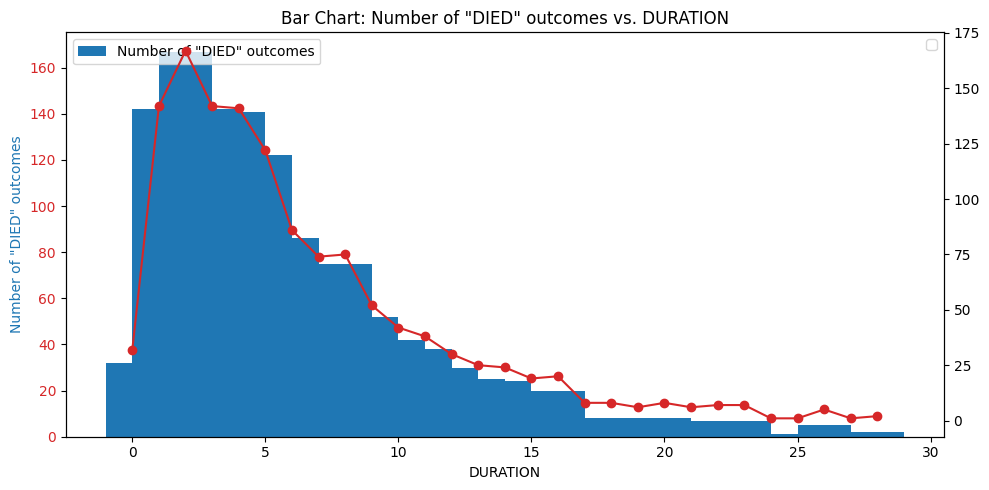

In [ ]:
import matplotlib.pyplot as plt

#counting the DIED outcomes
died_outcomes = df_TB[df_TB['OUT COME'] == 'DIED'].groupby('DURATION').size()
died_outcomes = died_outcomes.sort_index()

#counting the total outcomes
total_outcomes = df_TB.groupby('DURATION').size()

##computing the proportion of DIED proportion
proportion = died_outcomes / total_outcomes

#Plotting Number of "DIED" outcomes vs. DURATION
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(died_outcomes.index, died_outcomes.values, width=2, label='Number of "DIED" outcomes' )
ax1.set_xlabel('DURATION')
ax1.set_ylabel('Number of "DIED" outcomes', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Bar Chart: Number of "DIED" outcomes vs. DURATION')

ax2 = ax1.twinx()

ax2.plot(died_outcomes.index, died_outcomes.values,color='tab:red', linestyle='-', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


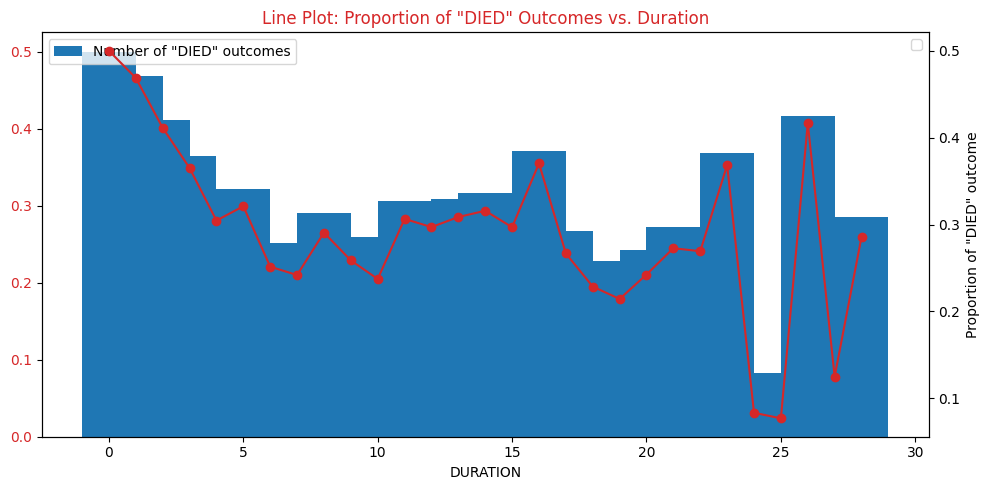

In [ ]:
#Plotting for Proportion of "DIED" Outcomes vs. Duration'
proportion = proportion.sort_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(proportion.index, proportion.values, width=2, label='Number of "DIED" outcomes' )
ax1.set_xlabel('DURATION')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()

ax2.plot(proportion.index, proportion.values,color='tab:red', marker='o')
ax2.set_ylabel('Proportion of "DIED" outcome')
ax2.set_title('Line Plot: Proportion of "DIED" Outcomes vs. Duration', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
